In [1]:
# Core libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Machine Learning libraries
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.metrics import (classification_report, confusion_matrix, accuracy_score, 
                           balanced_accuracy_score, f1_score, precision_score, recall_score)
from sklearn.preprocessing import StandardScaler
import joblib

try:
    import xgboost as xgb
    XGBOOST_AVAILABLE = True
except ImportError:
    XGBOOST_AVAILABLE = False
    print("XGBoost not available. Install with: pip install xgboost")
print("Libraries imported successfully!")
print(f"XGBoost available: {XGBOOST_AVAILABLE}")

Libraries imported successfully!
XGBoost available: True


In [12]:
print("LOADING PREPROCESSED DATA")

try:
    # Load preprocessed datasets
    x_train = pd.read_csv('x_train_scaled.csv')
    x_val = pd.read_csv('x_val_scaled.csv')
    x_test = pd.read_csv('x_test_scaled.csv')
    
    y_train = pd.read_csv('y_train_scaled.csv').squeeze()
    y_val = pd.read_csv('y_val.csv').squeeze()
    y_test = pd.read_csv('y_test.csv').squeeze()

     # Load preprocessing objects
    scaler = joblib.load('scaler.pkl')
    selected_features = joblib.load('selected_features.pkl')
    
    print("...Preprocessed data loaded successfully!!....")
    print(f"Training set: {x_train.shape}")
    print(f"Validation set: {x_val.shape}")
    print(f"Test set: {x_test.shape}")
    
    # Display class distribution
    print("\nClass distribution:")
    print("Training set:")
    print(y_train.value_counts().sort_index())
    print("\nValidation set:")
    print(y_val.value_counts().sort_index())
    print("\nTest set:")
    print(y_test.value_counts().sort_index())
    
    # Display selected features
    print(f"\nSelected features ({len(selected_features)}):")
    for i, feature in enumerate(selected_features, 1):
        print(f"{i:2d}. {feature}")
        
except FileNotFoundError as e:
    print(f"Error loading preprocessed data: {e}")
    print("Please run the preprocessing notebook first to generate the required files.")
    print("Required files: X_train_scaled.csv, X_val_scaled.csv, X_test_scaled.csv")
    print("                y_train.csv, y_val.csv, y_test.csv")
    print("                scaler.pkl, selected_features.pkl")



LOADING PREPROCESSED DATA
...Preprocessed data loaded successfully!!....
Training set: (506, 7)
Validation set: (123, 7)
Test set: (123, 7)

Class distribution:
Training set:
Loan_Status
0    253
1    253
Name: count, dtype: int64

Validation set:
Loan_Status
0    39
1    84
Name: count, dtype: int64

Test set:
Loan_Status
0    38
1    85
Name: count, dtype: int64

Selected features (7):
 1. Credit_History
 2. ApplicantIncome_log
 3. CoapplicantIncome_log
 4. LoanAmount_log
 5. Total_income
 6. Loan_income_ratio
 7. Income_per_dependents


### Random forest classifier(Recommended)

In [13]:
print("RANDOM FOREST CLASSIFIER")
print("EDA recommendation: Robust, captures interactions, insensitive to scaling and moderate outliers")

# Create Random Forest model
rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    class_weight='balanced',  # Handle class imbalance
    n_jobs=-1  )


# Train the model
rf_model.fit(x_train, y_train)
# rf_model.fit(x_train_scaled, y_train_scaled)

# predict
y_train_pred_rf = rf_model.predict(x_train)
y_val_pred_rf = rf_model.predict(x_val)
y_test_pred_rf = rf_model.predict(x_test)

#  Calculate metrics
train_accuracy_rf = accuracy_score(y_train, y_train_pred_rf)
val_accuracy_rf = accuracy_score(y_val, y_val_pred_rf)
test_accuracy_rf = accuracy_score(y_test, y_test_pred_rf)

train_balanced_acc_rf = balanced_accuracy_score(y_train, y_train_pred_rf)
val_balanced_acc_rf = balanced_accuracy_score(y_val, y_val_pred_rf)
test_balanced_acc_rf = balanced_accuracy_score(y_test, y_test_pred_rf)

train_f1_rf = f1_score(y_train, y_train_pred_rf, average='macro')
val_f1_rf = f1_score(y_val, y_val_pred_rf, average='macro')
test_f1_rf = f1_score(y_test, y_test_pred_rf, average='macro')

print(f"\nRandom Forest Performance:")
print(f"Training - Accuracy: {train_accuracy_rf:.3f}, Balanced Acc: {train_balanced_acc_rf:.3f}, Macro F1: {train_f1_rf:.3f}")
print(f"Validation - Accuracy: {val_accuracy_rf:.3f}, Balanced Acc: {val_balanced_acc_rf:.3f}, Macro F1: {val_f1_rf:.3f}")
print(f"Test - Accuracy: {test_accuracy_rf:.3f}, Balanced Acc: {test_balanced_acc_rf:.3f}, Macro F1: {test_f1_rf:.3f}")


RANDOM FOREST CLASSIFIER
EDA recommendation: Robust, captures interactions, insensitive to scaling and moderate outliers

Random Forest Performance:
Training - Accuracy: 1.000, Balanced Acc: 1.000, Macro F1: 1.000
Validation - Accuracy: 0.675, Balanced Acc: 0.625, Macro F1: 0.625
Test - Accuracy: 0.772, Balanced Acc: 0.763, Macro F1: 0.747


### Decision Tree classifier Based on EDA

In [14]:
from sklearn.tree import DecisionTreeClassifier
Dc_model = DecisionTreeClassifier(max_depth=5, random_state=42)

Dc_model.fit(x_train, y_train)

#predictions
y_train_pred_Dc= Dc_model.predict(x_train)
y_val_Dc= Dc_model.predict(x_val)
y_test_Dc= Dc_model.predict(x_test)

# Metricts cal
train_accuracy_Dc= accuracy_score(y_train, y_train_pred_Dc)
val_accuracy_Dc= accuracy_score(y_val, y_val_Dc)
test_accuracy_Dc= accuracy_score(y_test, y_test_Dc)


train_balanced_Dc = balanced_accuracy_score(y_train, y_train_pred_Dc)
val_balanced_acc_Dc= balanced_accuracy_score(y_val, y_val_Dc)
test_balanced_acc_Dc= balanced_accuracy_score(y_test, y_test_Dc)


train_f1_Dc = f1_score(y_train, y_train_pred_Dc, average='macro')
val_f1_Dc = f1_score(y_val, y_val_Dc, average='macro')
test_f1_Dc = f1_score(y_test, y_test_Dc, average='macro')


print(f"\nDecision Tree Classifier Performance:")
print(f"Training - Accuracy: {train_accuracy_Dc:.3f}, Balanced Acc: {train_balanced_Dc:.3f}, Macro F1: {train_f1_Dc:.3f}")
print(f"Validation - Accuracy: {val_accuracy_Dc:.3f}, Balanced Acc: {val_balanced_acc_Dc:.3f}, Macro F1: {val_f1_Dc:.3f}")
print(f"Test - Accuracy: {test_accuracy_Dc:.3f}, Balanced Acc: {test_balanced_acc_Dc:.3f}, Macro F1: {test_f1_Dc:.3f}")




Decision Tree Classifier Performance:
Training - Accuracy: 0.777, Balanced Acc: 0.777, Macro F1: 0.773
Validation - Accuracy: 0.707, Balanced Acc: 0.648, Macro F1: 0.652
Test - Accuracy: 0.780, Balanced Acc: 0.747, Macro F1: 0.745


### XG BOOSTER

In [15]:

print("LABEL ENCODING FOR XGBOOST COMPATIBILITY")
print("XGBoost requires class labels to start from 0, but wine quality starts from 3")

# Create label encoder
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# Fit on all target data to ensure consistent encoding
all_y = pd.concat([y_train, y_val, y_test], ignore_index=True)
label_encoder.fit(all_y)

# Transform all target variables
y_train_encoded = label_encoder.transform(y_train)
y_val_encoded = label_encoder.transform(y_val)
y_test_encoded = label_encoder.transform(y_test)

print(f"Original classes: {sorted(y_train.unique())}")
print(f"Encoded classes: {sorted(y_train_encoded)}")
print(f"Class mapping: {dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))}")

# Display encoded class distribution
print("\nEncoded class distribution:")
print("Training set:")
unique, counts = np.unique(y_train_encoded, return_counts=True)
for cls, count in zip(unique, counts):
    print(f"  Class {cls}: {count} samples")

print("Validation set:")
unique, counts = np.unique(y_val_encoded, return_counts=True)
for cls, count in zip(unique, counts):
    print(f"  Class {cls}: {count} samples")

print("Test set:")
unique, counts = np.unique(y_test_encoded, return_counts=True)
for cls, count in zip(unique, counts):
    print(f"  Class {cls}: {count} samples")

print("Label encoding completed!")


LABEL ENCODING FOR XGBOOST COMPATIBILITY
XGBoost requires class labels to start from 0, but wine quality starts from 3
Original classes: [np.int64(0), np.int64(1)]
Encoded classes: [np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0),

In [16]:
#  XGBoost Classifier
print(".....XGBOOST CLASSIFIER....")
print("EDA recommendation: Best performance for structured data, handles non-linearity and feature interactions automatically")

if XGBOOST_AVAILABLE:
    # Create XGBoost model
    xgb_model = xgb.XGBClassifier(
        n_estimators=100,
        random_state=42,
        eval_metric='mlogloss',
        n_jobs=-1
    )
    
    # Train the model (using encoded labels for XGBoost)
    xgb_model.fit(x_train, y_train_encoded)
    
    # Make predictions
    y_train_pred_xgb = xgb_model.predict(x_train)
    y_val_pred_xgb = xgb_model.predict(x_val)
    y_test_pred_xgb = xgb_model.predict(x_test)
    
    # Convert predictions back to original labels for evaluation
    y_train_pred_xgb_original = label_encoder.inverse_transform(y_train_pred_xgb)
    y_val_pred_xgb_original = label_encoder.inverse_transform(y_val_pred_xgb)
    y_test_pred_xgb_original = label_encoder.inverse_transform(y_test_pred_xgb)
    
    # Calculate metrics using original labels
    train_accuracy_xgb = accuracy_score(y_train, y_train_pred_xgb_original)
    val_accuracy_xgb = accuracy_score(y_val, y_val_pred_xgb_original)
    test_accuracy_xgb = accuracy_score(y_test, y_test_pred_xgb_original)
    
    train_balanced_acc_xgb = balanced_accuracy_score(y_train, y_train_pred_xgb_original)
    val_balanced_acc_xgb = balanced_accuracy_score(y_val, y_val_pred_xgb_original)
    test_balanced_acc_xgb = balanced_accuracy_score(y_test, y_test_pred_xgb_original)
    
    train_f1_xgb = f1_score(y_train, y_train_pred_xgb_original, average='macro')
    val_f1_xgb = f1_score(y_val, y_val_pred_xgb_original, average='macro')
    test_f1_xgb = f1_score(y_test, y_test_pred_xgb_original, average='macro')
    
    print(f"\nXGBoost Performance:")
    print(f"Training - Accuracy: {train_accuracy_xgb:.3f}, Balanced Acc: {train_balanced_acc_xgb:.3f}, Macro F1: {train_f1_xgb:.3f}")
    print(f"Validation - Accuracy: {val_accuracy_xgb:.3f}, Balanced Acc: {val_balanced_acc_xgb:.3f}, Macro F1: {val_f1_xgb:.3f}")
    print(f"Test - Accuracy: {test_accuracy_xgb:.3f}, Balanced Acc: {test_balanced_acc_xgb:.3f}, Macro F1: {test_f1_xgb:.3f}")
    print("XGBoost model completed!")
    
else:
    print("... XGBoost not available. Skipping XGBoost model.")
    xgb_results = None


.....XGBOOST CLASSIFIER....
EDA recommendation: Best performance for structured data, handles non-linearity and feature interactions automatically

XGBoost Performance:
Training - Accuracy: 1.000, Balanced Acc: 1.000, Macro F1: 1.000
Validation - Accuracy: 0.683, Balanced Acc: 0.637, Macro F1: 0.636
Test - Accuracy: 0.724, Balanced Acc: 0.698, Macro F1: 0.689
XGBoost model completed!


#### **5. Model Comparison and Evaluation**

In [17]:
models = ['Random Forest', 'DecisionTreeClassifier','XgBooster']
accuracies = [{'Train': accuracy_score(y_train, y_train_pred_rf),
                'Test': accuracy_score(y_test, y_test_pred_rf),
                'Val': accuracy_score(y_val, y_val_pred_rf)},
            {'Train': accuracy_score(y_train, y_train_pred_Dc),
            'Test': accuracy_score(y_test, y_test_Dc),
            'Val': accuracy_score(y_val, y_val_Dc)},
            {'Train': accuracy_score(y_train,y_train_pred_xgb_original ),
            'Test': accuracy_score(y_test, y_test_pred_xgb_original),
            'Val': accuracy_score(y_val, y_val_pred_xgb_original)}]

balanced = [
    {'Train': balanced_accuracy_score(y_train, y_train_pred_rf),
     'Test': balanced_accuracy_score(y_test, y_test_pred_rf),
     'Val': balanced_accuracy_score(y_val, y_val_pred_rf)},
    
    {'Train': balanced_accuracy_score(y_train, y_train_pred_Dc),
     'Test': balanced_accuracy_score(y_test, y_test_Dc),
     'Val': balanced_accuracy_score(y_val, y_val_Dc)},
    
    {'Train': balanced_accuracy_score(y_train, y_train_pred_xgb_original),
     'Test': balanced_accuracy_score(y_test, y_test_pred_xgb_original),
     'Val': balanced_accuracy_score(y_val, y_val_pred_xgb_original)}]

f1_scores = [
    {'Train': f1_score(y_train, y_train_pred_rf, average='macro'),
     'Val': f1_score(y_val, y_val_pred_rf, average='macro'),
     'Test': f1_score(y_test, y_test_pred_rf, average='macro')},
    
    {'Train': f1_score(y_train, y_train_pred_Dc, average='macro'),
     'Val': f1_score(y_val, y_val_Dc, average='macro'),
     'Test': f1_score(y_test, y_test_Dc, average='macro')},
    
    {'Train': f1_score(y_train, y_train_pred_xgb_original, average='macro'),
     'Val': f1_score(y_val, y_val_pred_xgb_original, average='macro'),
     'Test': f1_score(y_test, y_test_pred_xgb_original, average='macro')}
]



model_comparison = pd.DataFrame({
    'Model': models,
    'Train Accuracy': [a['Train'] for a in accuracies],
    'Test Accuracy': [a['Test'] for a in accuracies],
    'Val Accuracy': [a['Val'] for a in accuracies],
    'Train Balanced': [b['Train'] for b in balanced],
    'Test Balanced': [b['Test'] for b in balanced],
    'Val Balanced': [b['Val'] for b in balanced],
    'Train F1': [f['Train'] for f in f1_scores],
    'Test F1': [f['Test'] for f in f1_scores],
    'Val F1': [f['Val'] for f in f1_scores]
})
print(model_comparison)

                    Model  Train Accuracy  Test Accuracy  Val Accuracy  \
0           Random Forest         1.00000       0.772358      0.674797   
1  DecisionTreeClassifier         0.77668       0.780488      0.707317   
2               XgBooster         1.00000       0.723577      0.682927   

   Train Balanced  Test Balanced  Val Balanced  Train F1   Test F1    Val F1  
0         1.00000       0.762539      0.624542  1.000000  0.746914  0.624542  
1         0.77668       0.746594      0.648352  0.773386  0.744794  0.652106  
2         1.00000       0.698142      0.637363  1.000000  0.689024  0.636398  


In [18]:
best_model = model_comparison.loc[model_comparison['Val F1'].idxmax()]
print(best_model)

Model             DecisionTreeClassifier
Train Accuracy                   0.77668
Test Accuracy                   0.780488
Val Accuracy                    0.707317
Train Balanced                   0.77668
Test Balanced                   0.746594
Val Balanced                    0.648352
Train F1                        0.773386
Test F1                         0.744794
Val F1                          0.652106
Name: 1, dtype: object


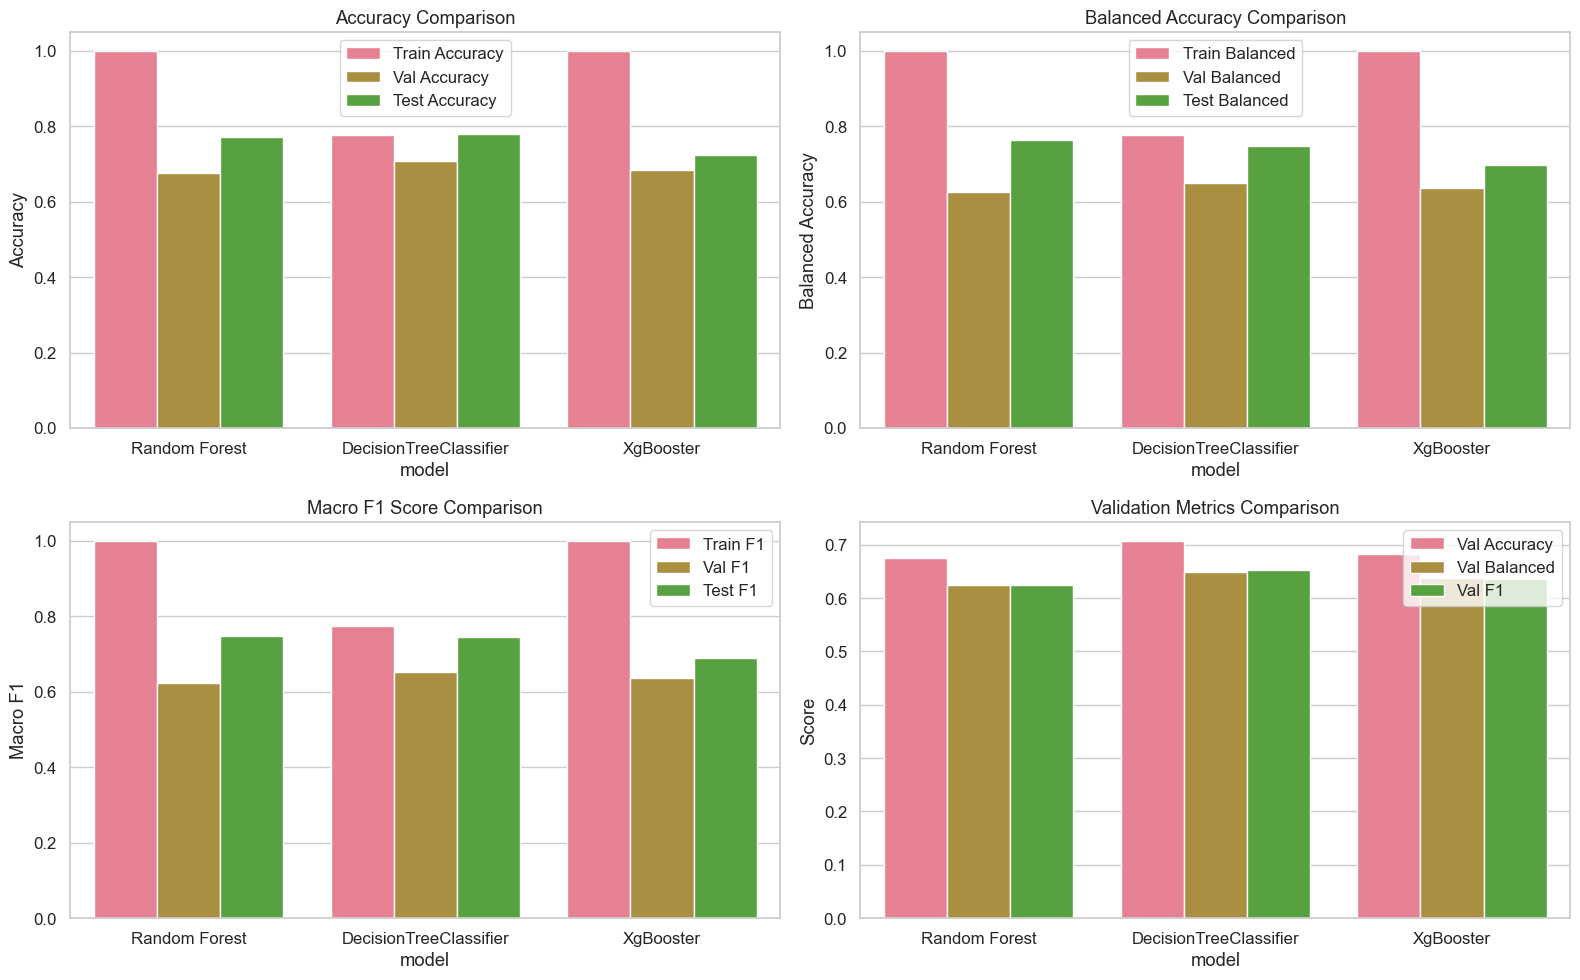

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Example DataFrame (use your actual model_comparison)
# model_comparison = pd.DataFrame(...)

sns.set(style="whitegrid", palette="husl", font_scale=1.1)

fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# --- 1. Accuracy Comparison ---
sns.barplot(
    x='Model',
    y='value',
    hue='variable',
    data=pd.melt(
        model_comparison,
        id_vars=['Model'],
        value_vars=['Train Accuracy', 'Val Accuracy', 'Test Accuracy']
    ),
    ax=axes[0, 0]
)
axes[0, 0].set_title('Accuracy Comparison')
axes[0, 0].set_ylabel('Accuracy')

# --- 2. Balanced Accuracy Comparison ---
sns.barplot(
    x='Model',
    y='value',
    hue='variable',
    data=pd.melt(
        model_comparison,
        id_vars=['Model'],
        value_vars=['Train Balanced', 'Val Balanced', 'Test Balanced']
    ),
    ax=axes[0, 1]
)
axes[0, 1].set_title('Balanced Accuracy Comparison')
axes[0, 1].set_ylabel('Balanced Accuracy')

# --- 3. Macro F1 Score Comparison ---
sns.barplot(
    x='Model',
    y='value',
    hue='variable',
    data=pd.melt(
        model_comparison,
        id_vars=['Model'],
        value_vars=['Train F1', 'Val F1', 'Test F1']
    ),
    ax=axes[1, 0]
)
axes[1, 0].set_title('Macro F1 Score Comparison')
axes[1, 0].set_ylabel('Macro F1')

# --- 4. Validation Metrics Comparison ---
sns.barplot(
    x='Model',
    y='value',
    hue='variable',
    data=pd.melt(
        model_comparison,
        id_vars=['Model'],
        value_vars=['Val Accuracy', 'Val Balanced', 'Val F1']
    ),
    ax=axes[1, 1]
)
axes[1, 1].set_title('Validation Metrics Comparison')
axes[1, 1].set_ylabel('Score')

# Layout adjustments
for ax in axes.flat:
    ax.legend(title=None)
    ax.set_xlabel('model')

plt.tight_layout()
plt.show()


### Detailed evaluation of the Best Model

Accuracy: 0.7804878048780488
Balanced accuracy: 0.7465944272445821
Validation f1 score 0.652105593966059
Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.66      0.65        38
           1       0.85      0.84      0.84        85

    accuracy                           0.78       123
   macro avg       0.74      0.75      0.74       123
weighted avg       0.78      0.78      0.78       123

Confusion Matrix:
[[25 13]
 [14 71]]


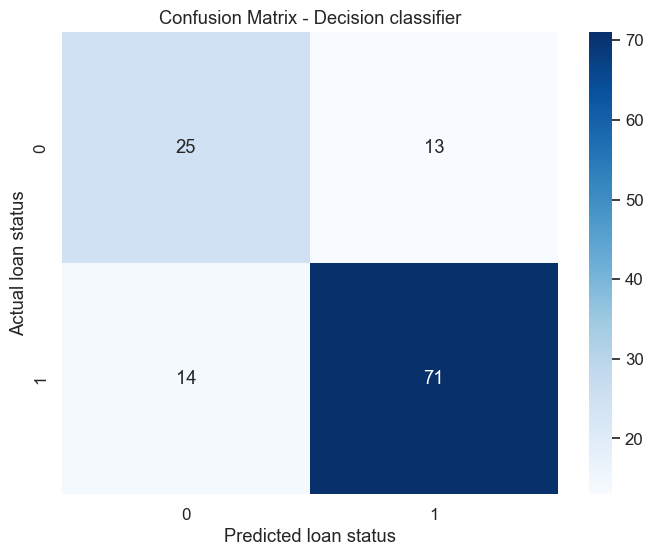

In [20]:
print("Accuracy:", accuracy_score(y_test, y_test_Dc))
print("Balanced accuracy:",balanced_accuracy_score(y_test, y_test_Dc) )
print("Validation f1 score",f1_score(y_val, y_val_Dc, average='macro'))

print("Classification Report:")
print(classification_report(y_test, y_test_Dc))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_Dc))
#  Visualize confusion matrix
cm = confusion_matrix(y_test, y_test_Dc)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=sorted(y_test.unique()), 
            yticklabels=sorted(y_test.unique()))
plt.title(f'Confusion Matrix - Decision classifier')
plt.xlabel('Predicted loan status')
plt.ylabel('Actual loan status')
plt.show()

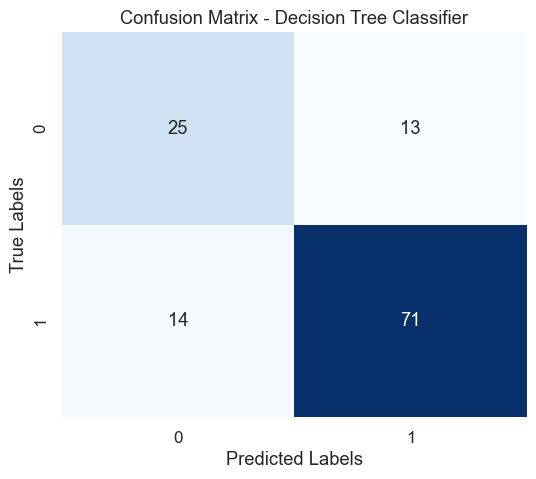

In [26]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(y_test, y_test_Dc)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
             xticklabels= sorted(y_test.unique()),
              yticklabels= sorted(y_test.unique()))

plt.title('Confusion Matrix - Decision Tree Classifier')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()
